# Importing Libraries and Data

In [1]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use

In [2]:
df=pd.read_csv('..//Pakistan Largest Ecommerce Dataset.csv')

C:\Users\samee\.conda\envs\mytfenv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
#to remove unwanted rows in the data
df=df.iloc[:584524,:21]

In [4]:
df.head()

item_id          status created_at  \
0  211131.0        complete   7/1/2016   
1  211133.0        canceled   7/1/2016   
2  211134.0        canceled   7/1/2016   
3  211135.0        complete   7/1/2016   
4  211136.0  order_refunded   7/1/2016   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0          1.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0          1.0   
2                                 Ego_UP0017-999-MR0  2450.0          1.0   
3                                     kcc_krone deal   360.0          1.0   
4                                        BK7010400AG   555.0          2.0   

   grand_total increment_id    category_name_1 sales_commission_code  ...  \
0       1950.0    100147443    Women's Fashion                    \N  ...   
1        240.0    100147444  Beauty & Grooming                    \N  ...   
2       2450.0    100147445    Women's Fashion                    \N  ...   
3         60.0    100147446  Beauty & Grooming           R-FSD-52352  ...   
4       1110.0    100147447            Soghaat                    \N  ...   

   payment_method Working Date BI Status      MV     Year  Month  \
0             cod     7/1/2016     #REF!   1,950   2016.0    7.0   
1             cod     7/1/2016     Gross     240   2016.0    7.0   
2             cod     7/1/2016     Gross   2,450   2016.0    7.0   
3             cod     7/1/2016       Net     360   2016.0    7.0   
4             cod     7/1/2016     Valid   1,110   2016.0    7.0   

   Customer Since     M-Y    FY Customer ID  
0          2016-7  7-2016  FY17         1.0  
1          2016-7  7-2016  FY17         2.0  
2          2016-7  7-2016  FY17         3.0  
3          2016-7  7-2016  FY17         4.0  
4          2016-7  7-2016  FY17         5.0  

[5 rows x 21 columns]

# Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [6]:
#let's change the data type of some columns
df['Year']=df['Year'].astype('str')

In [7]:
#let's start from description of data
df.describe()

item_id         price    qty_ordered   grand_total  \
count  584524.000000  5.845240e+05  584524.000000  5.845240e+05   
mean   565667.074218  6.348748e+03       1.296388  8.530619e+03   
std    200121.173648  1.494927e+04       3.996061  6.132081e+04   
min    211131.000000  0.000000e+00       1.000000 -1.594000e+03   
25%    395000.750000  3.600000e+02       1.000000  9.450000e+02   
50%    568424.500000  8.990000e+02       1.000000  1.960400e+03   
75%    739106.250000  4.070000e+03       1.000000  6.999000e+03   
max    905208.000000  1.012626e+06    1000.000000  1.788800e+07   

       discount_amount          Month    Customer ID  
count    584524.000000  584524.000000  584513.000000  
mean        499.492775       7.167654   45790.511965  
std        1506.943046       3.486305   34414.962389  
min        -599.500000       1.000000       1.000000  
25%           0.000000       4.000000   13516.000000  
50%           0.000000       7.000000   42856.000000  
75%         160.500000      11.000000   73536.000000  
max       90300.000000      12.000000  115326.000000

In [8]:
df['created_at']

0          7/1/2016
1          7/1/2016
2          7/1/2016
3          7/1/2016
4          7/1/2016
            ...    
584519    8/28/2018
584520    8/28/2018
584521    8/28/2018
584522    8/28/2018
584523    8/28/2018
Name: created_at, Length: 584524, dtype: object

The date is not in the format which most of the libraries like to use. We will convert the date into format of year-month-day for smooth analysis.

In [9]:
def date_fixer(x):
    split=x.split('/')
    mon=split[0]
    day=split[1]
    yr=split[2]
    if len(mon) == 1:
        mon='0'+mon
    if len(day) == 1:
        day='0'+day
    return yr+'-'+mon+'-'+day

In [10]:
df['created_at']=df['created_at'].apply(date_fixer)
df=df.sort_values('created_at')

In [11]:
#let's explore the status column
df['status'].value_counts()

complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
\N                     4
exchange               4
Name: status, dtype: int64

Seems like it has alot of repeated categories. These too many categories will hurdle us in visualizing, so let us make 4 broader categories.

Let us group complete, received, cod, paid, closed as Completed. order_refunded, refund, exchange will be categorize as Refunded. pending, payment_review, processing, holded, pending_paypal will be grouped as Pending. Canceled will be compiled in Canceled category. Since the number of rows of \n category has very less value, we will include them in canceled category.

In [12]:
df['status'].replace(['complete','received','cod','paid','closed'],'completed',inplace=True)
df['status'].replace(['order_refunded','refund','exchange'],'refunded',inplace=True)
df['status'].replace(['pending','payment_review','processing','holded','pending_paypal',r'\N'],'pending',inplace=True)
df['status'].replace(['canceled'],'canceled',inplace=True)

In [13]:
df['status'].value_counts()

completed    315487
canceled     201249
refunded      67583
pending         180
fraud            10
Name: status, dtype: int64

Great! The data is in correct format now.

## Discount vs Sell

Firstly, we will try to answer whether the sell increases with the increase in the discount amount.

In [14]:
dfn=df.groupby('created_at')[['grand_total','qty_ordered','discount_amount']].sum().reset_index()

In [15]:
dfc=df.groupby('created_at')['status'].count().reset_index()

In [16]:
dff=pd.merge(dfn,dfc)

In [17]:
#let's check if there is spikes in daily sales with respect to the discount
dff.set_index('created_at')[['grand_total','discount_amount']].iplot()

Conclusion: Amazing! as we anticipated. The sales indeed have increased with the increase in the amount of discount.

Let's check if the story is true for cumulative sum too or not.

In [18]:
dff['cum_grand_sum']=dff['grand_total'].cumsum()

In [19]:
dff['cum_discount_sum']=dff['discount_amount'].cumsum()

In [20]:
dff.set_index('created_at')[['cum_grand_sum','cum_discount_sum']].iplot()

Yes! The sales have skyrocketted with the increasing discount. However, before making any judgement we need to confirm how many of these orders got completed to comment on the increased sale. Let's sneak into individual status categories.

In [21]:
df1=df.groupby(['Year','status']).sum().reset_index()

In [22]:
px.bar(df1,x='Year',y='grand_total',color='status', title='Yearly Categorization of Status')

There is a huge chunk of orders that got cancelled. We need to drop them to see what is the real picture of orders being increased due to discount.

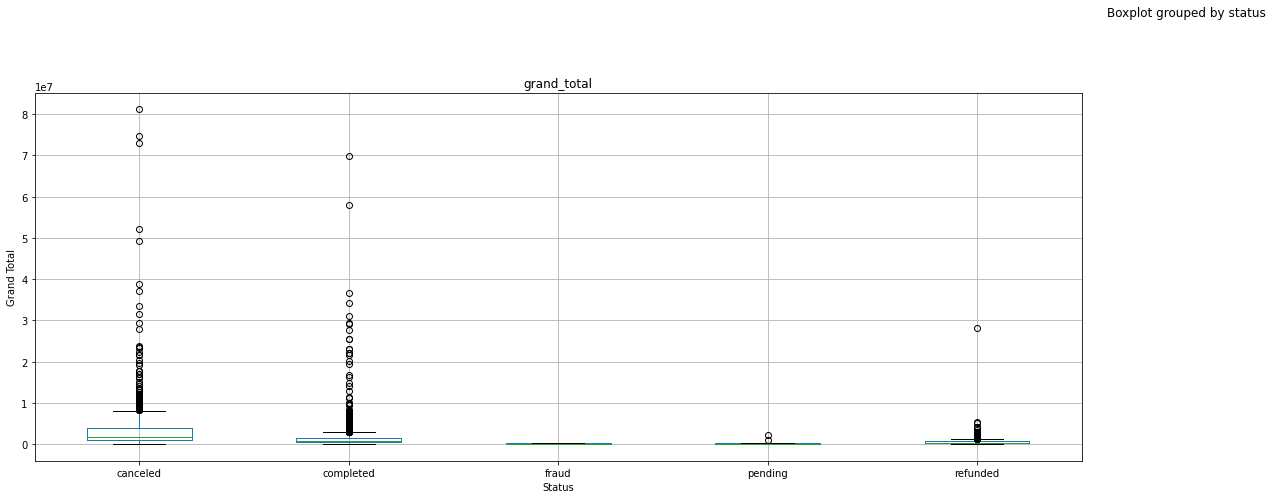

In [23]:
#to check how these categories are distibuted
dft=df.groupby(['created_at','status']).sum().reset_index()
fig = plt.figure(figsize=(40,15))
ax_1 = fig.add_subplot(221);
dft.boxplot(column='grand_total',by='status',ax=ax_1)
ax_1.set_xlabel("Status");
ax_1.set_ylabel("Grand Total");

Let's check the collective worth or grand total of all these status categories

In [24]:
dft=df1.groupby('status').sum().reset_index()

In [25]:
fig=px.bar(dft,x='status',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

Almost Rs. 2.9B of orders have been cancelled. Only orders of worth Rs. 1.6B have been completed.

We need to drop these cancelled orders to see the real picture

In [26]:
dft=df[df.status=='completed'].groupby('created_at').sum().reset_index()

In [27]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=dft['created_at'],y=dft['grand_total'],mode='lines+markers',name='grand_total'))
fig.add_trace(go.Scatter(x=dft['created_at'],y=dft['discount_amount'],mode='lines+markers',name='discount_amount'))

Luckily the trend is preserved. There is indeed spikes in order with the increase in the discount amount.

## Categories

Now it is time to answer which category is hot and driven most audience.

In [28]:
dft=df.groupby('category_name_1').sum().reset_index()

In [29]:
fig=px.bar(dft,x='category_name_1',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

Seems like Mobiles & Tablets is the hottest category. But, we know, there is a huge chunk of cancelled orders. Let's check out of these orders, how many were cancelled or completed.

In [30]:
dft=df.groupby(['category_name_1','status']).sum().reset_index()

In [31]:
px.bar(dft,x='category_name_1',y='grand_total',color='status',barmode='group')

For almost every category, the number of orders that got canceled are greater than the one which got completed.

Let's check the yearly history to know which category has outshined each year.

<AxesSubplot:xlabel='Year', ylabel='category_name_1'>

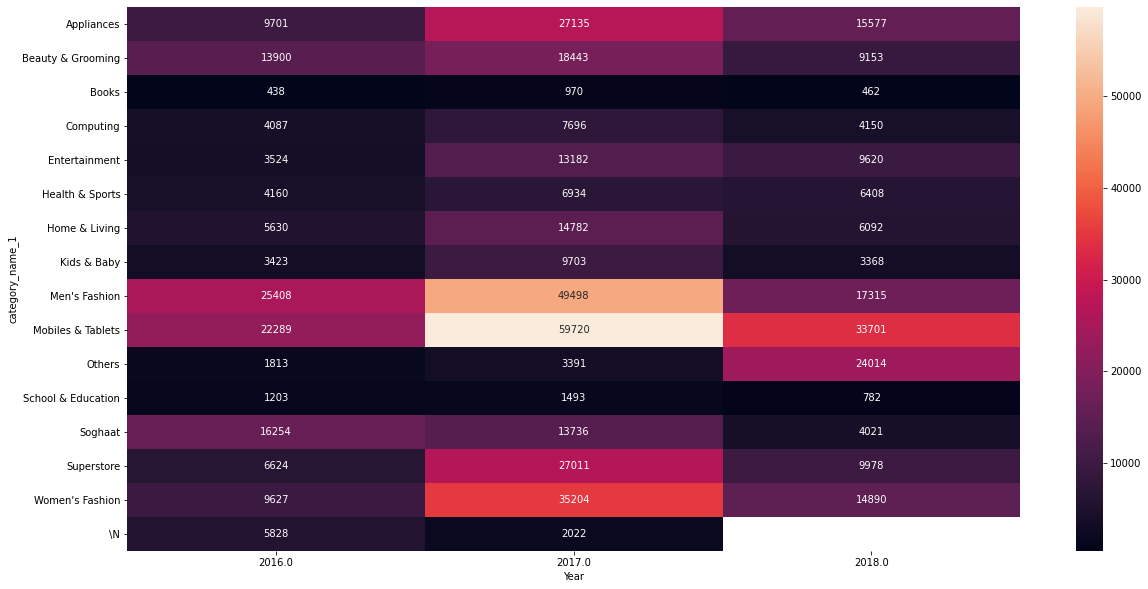

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.groupby(['Year','category_name_1']).size().unstack().T,annot=True,fmt='.0f')

Mobile phones and tablets is remained top throughout. Men's fashion is the second most famous category. 

let's check what percentage of completed orders have generated more revenue.

In [33]:
df1=df[df['status']=='completed'].groupby('category_name_1').size().reset_index(name='count')

In [34]:
df1['Percentage of Orders'] = df1['count']/np.sum(df1['count'])*100

In [35]:
df1['Revenue Generated']=df.groupby('category_name_1').sum()['grand_total'].values

In [36]:
df1['Percentage of Revenue'] = df1['Revenue Generated']/np.sum(df1['Revenue Generated'])*100

In [37]:
df1.sort_values(by='count',ascending=False,inplace=True)

In [38]:
fig=go.Figure()
fig.add_trace(go.Bar(x=df1['category_name_1'],y=df1['Percentage of Orders'],name='Orders',text=df1['Percentage of Orders']))
fig.add_trace(go.Bar(x=df1['category_name_1'],y=df1['Percentage of Revenue'],name='Revenue',text=df1['Percentage of Revenue']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Percentage of Successful orders and genrated revenue',xaxis_title='Categories',yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

The top categories with the completed orders in terms of number of orders are:

In [39]:
px.pie(df1.sort_values(by='category_name_1',ascending=False),values='count',names='category_name_1',title='Category share by volume')

The top categories with the completed orders are:

In [40]:
dft[dft.status == 'completed'].set_index('category_name_1')['grand_total'].sort_values(ascending=False)

category_name_1
Mobiles & Tablets     6.131490e+08
Appliances            2.370856e+08
Entertainment         1.928798e+08
Women's Fashion       1.457730e+08
Men's Fashion         8.901637e+07
Superstore            6.067131e+07
Others                5.879390e+07
Beauty & Grooming     5.013202e+07
Computing             4.909160e+07
Home & Living         4.206294e+07
Soghaat               2.649809e+07
Kids & Baby           2.176329e+07
Health & Sports       2.158192e+07
\N                    1.869671e+07
School & Education    3.282045e+06
Books                 1.621492e+06
Name: grand_total, dtype: float64

#### Conclusion:
Top Categories by volume:
- Men's Fashion
- Mobiles & Tablets
- Women's Fashion

Top Categories by generated Revenue:
- Mobiles & Tablets
- Appliances
- Entertainment

Since the Mobile & Tablets appear on both list this category is both lucerative and famous among buyers. Startups can focus on providing selling online mobile phones and tablets.

## Payment Methods

In [41]:
dft=df.groupby('payment_method')['grand_total'].sum().reset_index()

In [42]:
fig=px.bar(dft,x='payment_method',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

## Quantity Ordered

For this, we will get rid of all the canceled orders.

In [43]:
df_clean=df[df.status != 'canceled']

In [44]:
dft = df_clean.groupby(['created_at' ,'category_name_1', 'status'])['qty_ordered'].sum().reset_index()
px.scatter(dft, x="created_at", y="qty_ordered", color="status", size="qty_ordered", hover_data=['category_name_1','status'])

On March 28, 2018 the maximum number of orders have been completed.

## Payment method and Status

Since we have 16 unique status options and 18 unique payment_method, it is better to create a matrix to show the correlation then to create graphs.

In [45]:
dftt=df.groupby(['payment_method','status']).size().reset_index(name='count')

In [46]:
px.bar(dftt,x='payment_method',y='count',color='status',title='Payment Method with their Order Status')

<AxesSubplot:xlabel='payment_method', ylabel='status'>

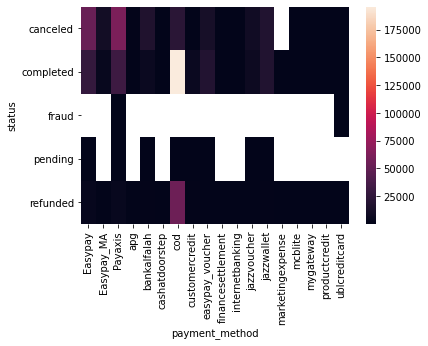

In [47]:
sns.heatmap(df.pivot_table(index=['status'],columns=['payment_method'],values='item_id',aggfunc='count'))

This tells Cash On Delivery is the best option for the customers. It has strong correlation with the completed order. However, it is not perfect. It too have relatively high refund and cancellation rate than other payment methods.

Let's explore how the payment trends of people have been changed through years. Have people really shifted towards digital payment options?

In [48]:
df['Year'].value_counts()

2017.0    290920
2018.0    159695
2016.0    133909
Name: Year, dtype: int64

In [49]:
dft=df.groupby(['Year','payment_method']).size().reset_index(name='count')

In [50]:
px.bar(dft,x='Year',y='count',color='payment_method',title='Yearly Categorization of Payment Methods')

The trend is not too much visible, let's split the data into two categories of either digital payment or cod.

In [51]:
dft=df.replace(np.delete(df['payment_method'].unique(),0),'digital_payment')

In [52]:
dftt=dft.groupby(['Year','payment_method']).size().reset_index(name='count')

In [53]:
px.bar(dftt,x='Year',y='count',color='payment_method',title='Year wise Digital and COD trends')

In [54]:
#by market size
dftt=dft.groupby(['Year','payment_method']).sum()['grand_total'].reset_index(name='volume')

In [55]:
px.bar(dftt,x='Year',y='volume',color='payment_method',title='Yearly Revenue Generated by Digital and COD')

In [56]:
dftt

Year   payment_method        volume
0  2016.0              cod  2.356997e+08
1  2016.0  digital_payment  4.098855e+08
2  2017.0              cod  5.891975e+08
3  2017.0  digital_payment  1.658068e+09
4  2018.0              cod  2.405168e+08
5  2018.0  digital_payment  1.852984e+09

Indeed. People have developed more trust on digital methods over years. But to comment on this growth we need to check whether this growth has more completed orders or canceled ones.

In [57]:
dftt=dft.groupby(['payment_method','status']).size().reset_index(name='count')

In [58]:
px.bar(dftt,x='payment_method',y='count',color='status',title='Payment Method and associated Order Status')

We feared right. Digital payments have more cancellation ratio. This may attribute to the payment integration issues that the ecommerce stores may have faced.

This too much cancellation rate has pushed me to attempt to analyze the yearly revenue lost due to these cancelled orders.

In [59]:
dftt=dft.groupby(['Year','status']).sum()['grand_total'].reset_index(name='count')

In [60]:
px.bar(dftt,x='Year',y='count',color='status',title='Yearly Order Status Trends')

Shoot! there is a huge amount of revenue lose associated with cancelled orders. It even reached to Rs. 1.6B in the year 2017. However, the revenue has became 4-fold from the year 2016 to 2017.

Great. It is worth exploring the successful order by all payment methods.

In [61]:
dftt=df[df['status']=='completed'].groupby(['Year','payment_method']).sum()['grand_total'].reset_index()

In [62]:
px.bar(dftt,x='Year',y='grand_total',color='payment_method',title='Yearly Payment Methods and Providers')

Cod, Easypay and easypay voucher are the major contributor of revenue.

#### Conclusion:
The category with the most number of completed orders is COD (Cash on delivery). There is a increasing trend of trust for digital payment methods among people. However, digital methods have more cancellation rate. 

## Predicting Future Sales & Trends

In [663]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [587]:
dff=df.groupby('created_at').sum()

We will perform the analysis on grand_total column as it represents the amount of daily revenue generated.

In [588]:
dff=pd.DataFrame(dff['grand_total'].copy())

In [589]:
dff

grand_total
created_at             
2016-07-01   1301026.75
2016-07-02   1408450.48
2016-07-03   2215490.88
2016-07-04   1094080.25
2016-07-05    913053.50
...                 ...
2018-08-24   2078130.30
2018-08-25   3669771.90
2018-08-26   3707955.40
2018-08-27   2425669.03
2018-08-28   3231153.75

[789 rows x 1 columns]

The data available to us is from 1 july 2016 to 28 august 2018. This makes the total days equal to 789 which we have exactly.

Firstly, to forecast the daily revenue generated we will use simpler models and then slowly climb towards the more advanced ones.

In [590]:
#let's plot the daily revenue
dff.iplot()

There is indeed some seasonality in the data with november being the month with the more revenue.

### Monthly Forecast

Since it has been just observed that the data has strong seasonality component in terms of months, let's perform the analysis on monthly revenue first.

In [591]:
dff.index=pd.to_datetime(dff.index)

In [592]:
dff.reset_index(inplace=True)

In [593]:
d=dff.copy()

In [594]:
d['month']=d['created_at'].apply(lambda x: x.month)
d['year']=d['created_at'].apply(lambda x: x.year)

In [595]:
d=d.groupby(['year','month']).sum().reset_index()

In [596]:
def date(cols):
    year=cols[0]
    mon=cols[1]
    return str(year)+'-'+str(mon)

In [597]:
d['date']=pd.to_datetime(d[['year','month']].apply(date,axis=1))

In [598]:
d.drop(['year','month'],axis=1,inplace=True)
d.set_index('date',inplace=True)

Before moving towards the selection of the model, let's first split the data into training and testing phase.

In [599]:
train=d[:22]
test=d[22:]

In [600]:
#let's check some statistics
train.describe().transpose()

count          mean           std          min           25%  \
grand_total   22.0  1.742203e+08  1.681080e+08  43291947.27  8.878778e+07   

                      50%           75%           max  
grand_total  1.155136e+08  1.906680e+08  7.995788e+08

In [601]:
#to check stationarity let's run an augmented dicky fuller test
def adf_test(p):
    results = adfuller(p)
    print('Test Statistics: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Critical Values: ')
    for key, value in results[4].items():
        print('\t%s: %.3f' % (key,value))

In [602]:
adf_test(train)

Test Statistics: 1.346856
p-value: 0.996859
Critical Values: 
	1%: -4.069
	5%: -3.127
	10%: -2.702


The p value is greater than 0.5 this indicates that the series is not stationary. For decreasing it further we can try different differencing techniques.

In [603]:
adf_test(train.diff().dropna())

Test Statistics: -4.175743
p-value: 0.000724
Critical Values: 
	1%: -3.924
	5%: -3.068
	10%: -2.674


Great! the series became stationary after 1st differencing.

Now, let's test the autocorrelation and partial autocorrelation plots.

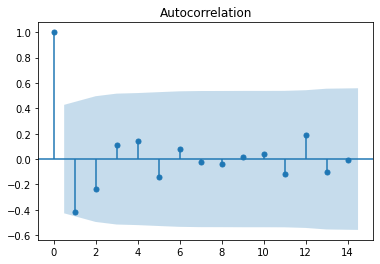

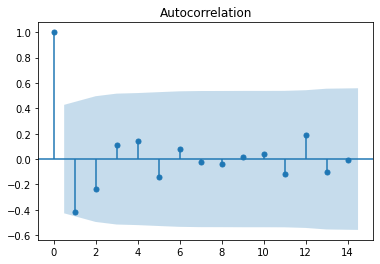

In [604]:
plot_acf(train.diff().dropna())

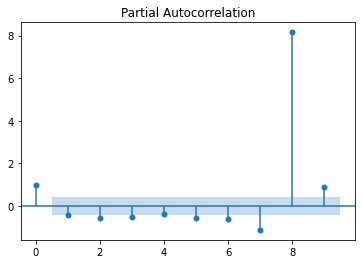

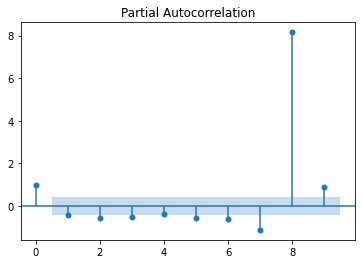

In [605]:
plot_pacf(train.diff().dropna(),lags=9)

##### AR Model

Firstly, let's begin the forecast with the simplest model. 

The first 2 values are outside the region, let's try the AR(2) model with 1st differencing.

In [606]:
ar=ARIMA(train,order=(3,1,1))

In [607]:
ar_model=ar.fit()

In [608]:
preds=ar_model.predict(start=22,end=25)

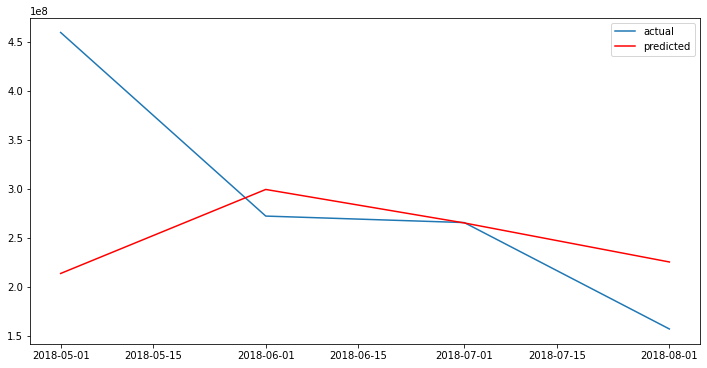

In [609]:
#let's plot a the predictions vs actual 
def plot_graphs(test,preds):
    plt.figure(figsize=(12,6))
    plt.plot(test,label='actual')
    plt.plot(preds,color='red',label='predicted')
    plt.legend()
    return plt.show()

plot_graphs(test,preds)

The Forecast of the model is not very appreciable. It can be further improved as there is a room for further improvement.

To get a more better picture, let us make a rolling forecast function to evaluate the prediction.

In [465]:
def rolling_forecast(train,test,p=0,d=0,q=0): 
    preds=pd.Series()
    pp=pd.concat([train,test])
    for i in range(-len(test),0):
        training=pp.iloc[:i]
        ar=ARIMA(training,order=(p,d,q))
        ar_model=ar.fit()
        pred=ar_model.predict(start=len(training),end=len(training))
        preds=preds.append(pred)
    return preds

In [466]:
#pd.concat([train['grand_total'],test['grand_total']])
roll_preds=rolling_forecast(train,test,p=3,d=1,q=1)

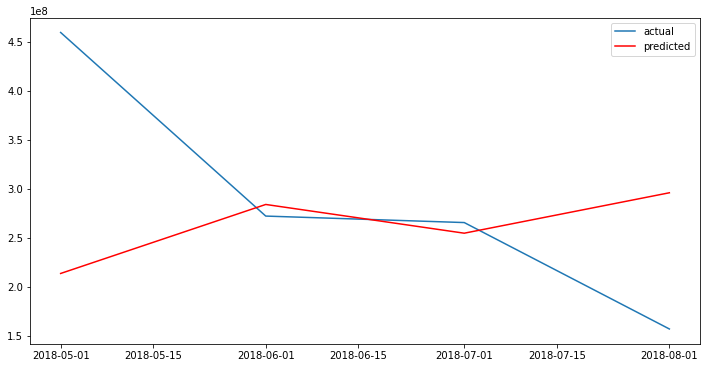

In [467]:
plot_graphs(test,roll_preds)

In [468]:
mean_absolute_error(test,roll_preds)-mean_absolute_error(test,preds)

16427850.975009426

It is shocking to find that the predictions were more closer to the actual when it predcited the future in advance instead of seeing the data once it appears and making predictions one step at a time.

### Weekly Forecast

Now it is time to build a model to predict the weekly forecast.

In [469]:
dw=dff.copy()
dw['week']=dw['created_at'].apply(lambda x:x.week)
dw['year']=dw['created_at'].apply(lambda x:x.year)

In [470]:
dw=dw.groupby(['year','week']).sum().reset_index()

In [471]:
dates=dw.year*100+dw.week
dw['date']=pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

In [472]:
dw.drop(['year','week'],axis=1,inplace=True)
dw.set_index('date',inplace=True)

In [473]:
dw

grand_total
date                    
2016-07-03  4.924968e+06
2016-07-10  4.335765e+06
2016-07-17  8.637705e+06
2016-07-24  1.077712e+07
2016-07-31  1.461638e+07
...                  ...
2018-08-05  3.638709e+07
2018-08-12  3.455097e+07
2018-08-19  7.009585e+07
2018-08-26  2.131711e+07
2018-09-02  5.656823e+06

[114 rows x 1 columns]

Before moving on, let's split the data into training and test set with first 100 instances in training and last 14 in test set.

In [474]:
train=dw.iloc[:100]
test=dw.iloc[100:]

Let's check the stationarity of the training set

In [475]:
adf_test(train)

Test Statistics: -6.527325
p-value: 0.000000
Critical Values: 
	1%: -3.498
	5%: -2.891
	10%: -2.583


The training data is already stationary. Let's build acf and pacf plot to guide us regarding the choice of model.

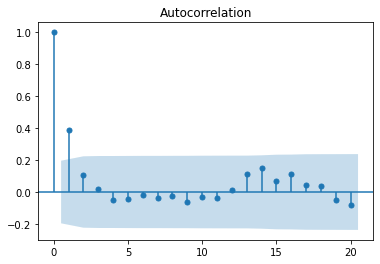

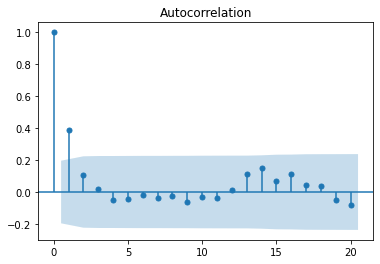

In [476]:
plot_acf(train)

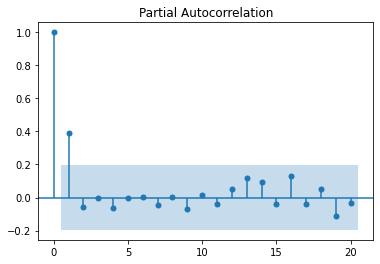

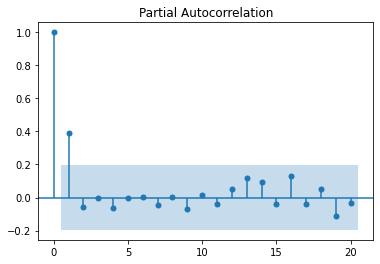

In [477]:
plot_pacf(train)

In [478]:
train.iplot()

ARIMA 1,0,1 model would be a good fit for this given case.

In [479]:
ar=ARIMA(train,order=(1,0,1))
ar_model=ar.fit()

In [480]:
week_preds=ar_model.predict(start=100,end=113)

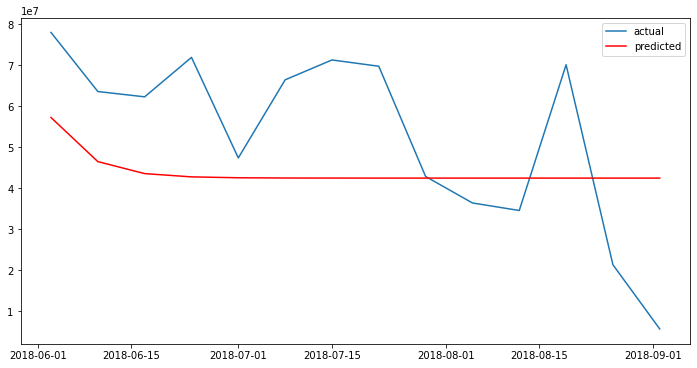

In [481]:
plot_graphs(test,week_preds)

This looks like a terrible forecast, but before moving towards the final judgement, let's explore the rolling forecast.

In [482]:
roll_preds=rolling_forecast(train,test,p=1,d=0,q=1)

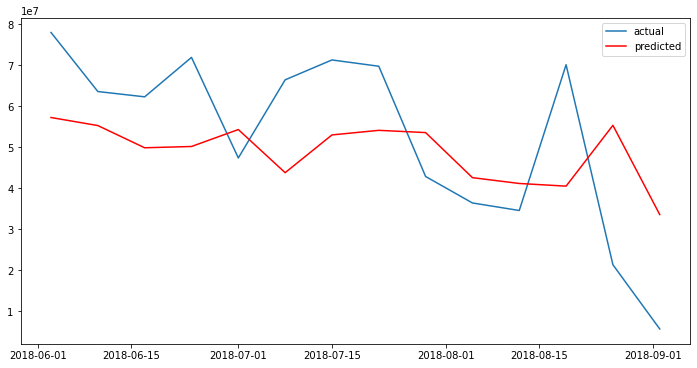

In [483]:
plot_graphs(test,roll_preds)

This one is much better. However, after hit and trial, the combination that gave the maximum closest overlap is 1,2,1. Let's use that

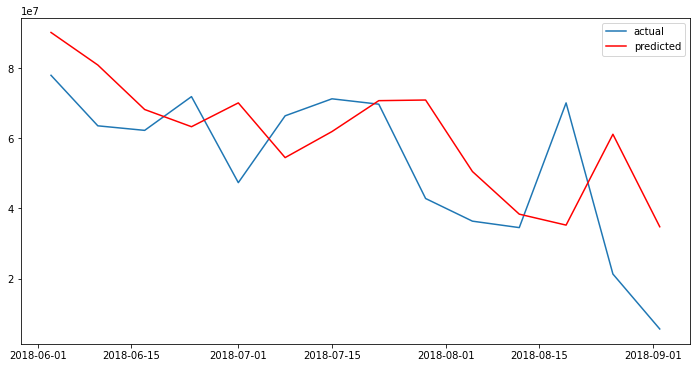

In [484]:
roll_preds=rolling_forecast(train,test,p=1,d=2,q=1)
plot_graphs(test,roll_preds)

Now the forecast looks like a reasonable one. However, it seems like the forecast is shifted one daya ahead.

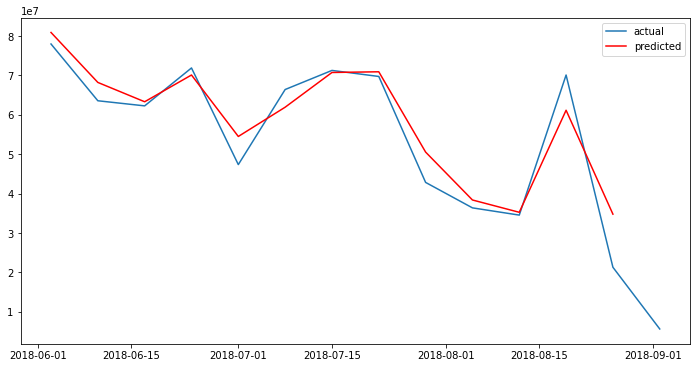

In [485]:
plot_graphs(test,roll_preds.shift(-1))

This forecast is much much better. It is really amazing to predict something soo random with such high accuracy(closeness).

### Daily Forecast

In [610]:
dd=dff.set_index('created_at').copy()

In [611]:
dd.iplot()

Let's check whether the daily forecast are stationary or not.

In [612]:
adf_test(dd)

Test Statistics: -6.759094
p-value: 0.000000
Critical Values: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


It is indeed stationary.

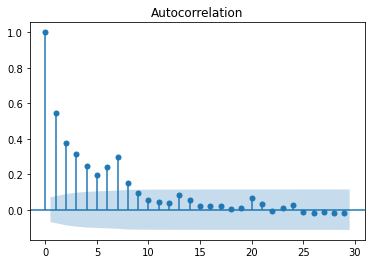

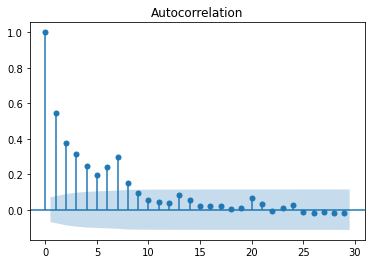

In [613]:
plot_acf(dd)

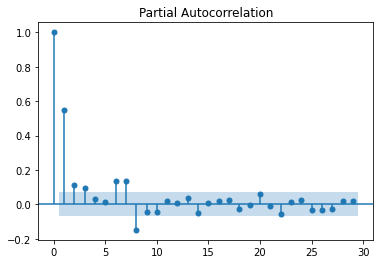

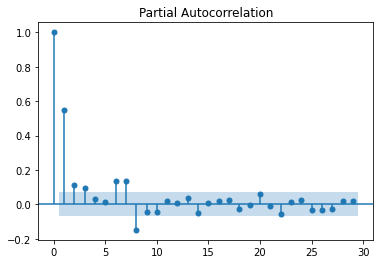

In [614]:
plot_pacf(dd)

In [615]:
train=dd.iloc[:-115]
test=dd.iloc[-115:]

From PACF plot we can deduce that p=[1,2,3,6,7,8] would give a good start, however we can drop some params to avoid overfitting.

From ACF MA (8) model would be a good start.

In [548]:
#let's build a simpler model
p=[1,7,8]
q=[1,8]

In [564]:
ar=ARIMA(train,order=(p,0,q))
ar_model=ar.fit()

In [532]:
preds=ar_model.predict(start=len(train),end=len(train)+len(test)-1)

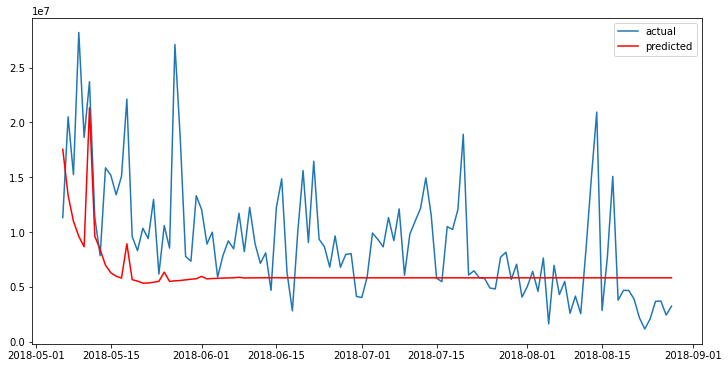

In [533]:
plot_graphs(test,preds)

Seems like the model started with a good prediction but as the model proceed the predictions started to become worst as the errors started to accumulate.

In [534]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                     grand_total   No. Observations:                  674
Model:             ARIMA([1, 7, 8], 0, [1, 8])   Log Likelihood              -11814.457
Date:                         Tue, 28 Sep 2021   AIC                          23642.913
Time:                                 15:25:38   BIC                          23674.506
Sample:                             07-01-2016   HQIC                         23655.147
                                  - 05-05-2018                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.821e+06   1.09e-09   5.32e+15      0.000    5.82e+06    5.82e+06
ar.L1          0.7100      0.038     18.518      0.000       0.635       0.785
ar.L7          0.2398      0.011     21.770      0.000       0.218       0.261
ar.L8         -0.2116      0.057     -3.731      0.000      -0.323      -0.100
ma.L1         -0.2603      0.056     -4.635      0.000      -0.370      -0.150
ma.L8          0.0294      0.077      0.379      0.704      -0.122       0.181
sigma2      1.024e+14   2.51e-15   4.07e+28      0.000    1.02e+14    1.02e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             93028.65
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               8.82   Skew:                             6.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.77e+43. Standard errors may be unstable.
"""

To get a better idea of the performance let's use the rolling forecast.

The following forecast will take time to run as it has many features.

In [535]:
roll_preds=rolling_forecast(train,test,p=p,d=0,q=q)

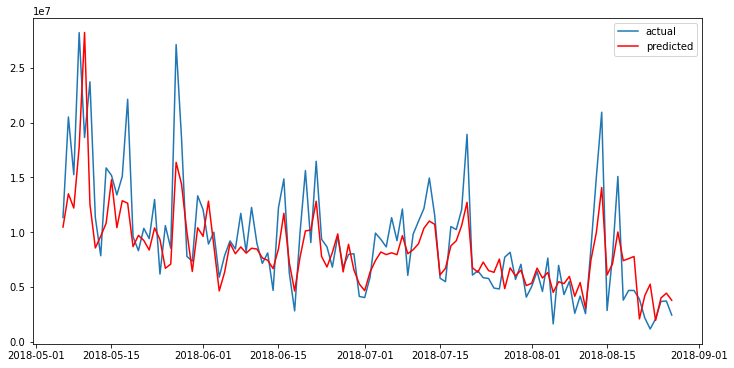

In [554]:
plot_graphs(test.iloc[:-1],roll_preds.shift(-1))

In [555]:
rp=rolling_forecast(train,test,p=[1,8],d=0,q=[1,8])

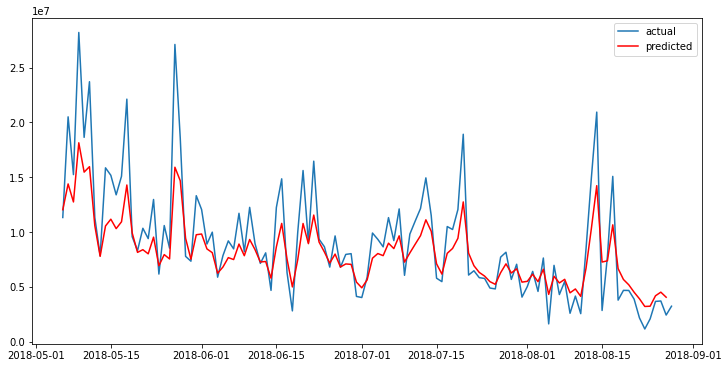

In [557]:
plot_graphs(test,rp.shift(-1))

Alternatively, we can also try and test the ARIMA(8,0,8) model, however, it will take too much time to calculate.

Let's train it into Colab and then bring that here.

In [616]:
roll_full_preds=pd.read_csv('roll_preds.csv')

In [617]:
roll_full_preds.columns=['created_at','grand_total']

In [618]:
roll_full_preds.set_index('created_at',inplace=True)

In [652]:
preds_roll=pd.Series(index=roll_preds.index,data=roll_full_preds.grand_total.values)

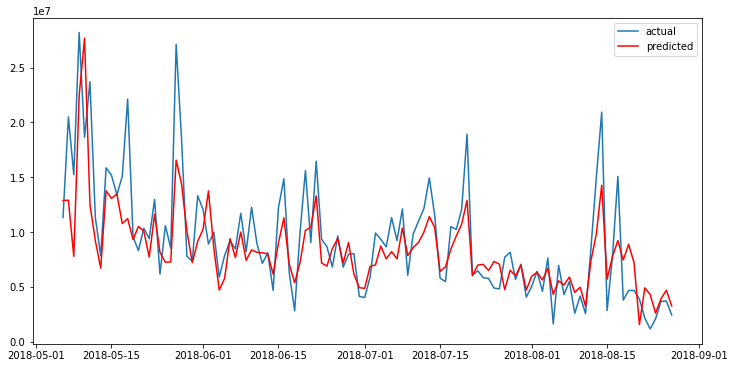

In [657]:
plot_graphs(test[:-1],preds_roll.shift(-1))

In [658]:
mean_absolute_error(test.iloc[:-1],roll_preds.shift(-1).dropna())-mean_absolute_error(test.iloc[:-1],roll_full_preds.shift(-1).dropna().values)

15624.619774985593

This tells that the ARIMA(8,0,8) model is a better fit than the simpler fit we tried.

This model can be used to make future forecast one timestep ahead.

Since we are using MA part of the ARIMA too this will make the future predictions worst.

## Trends

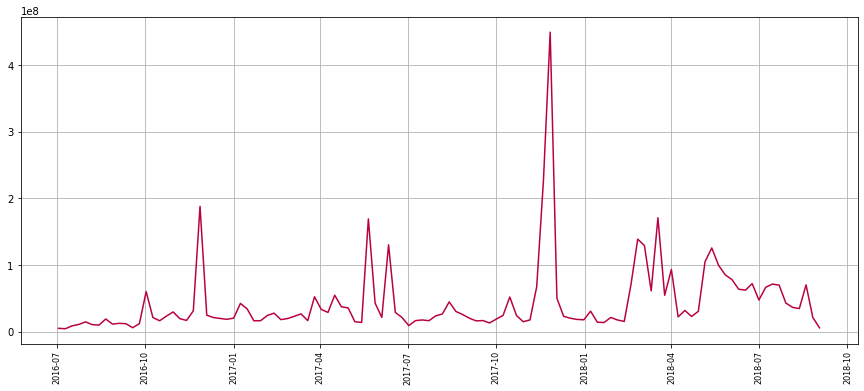

In [668]:
plt.figure(figsize=(15,6))
plt.plot(dw,color='#b80045')
plt.xticks(rotation='vertical',size=8)
plt.grid('on')
plt.show()

#### Conclusion:
We observe overall trend from july-2016 to aug-2018 and concluded following points:
1. There is a increase in purchase of last three months ( October, November and December ) of 2016 and 2017
2. November is the month with the more number of shoppers
3. This means that the november is the most suitable month for product sellers
4. The overall volume of the online sells is increasing with time
5. This can be observed by the first six month of 2018